# Import Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load Image with OpenCV

In [2]:
main_image = cv2.imread('buildings.jpg')
print(main_image.shape) # Image is loaded as BGR

(7728, 5152, 3)


# Show Image

## First, try cv2

In [3]:
# Using cv2.imshow() method 
# Displaying the image 
cv2.imshow('building image', main_image)
  
# waits for user to press any key 
# (this is necessary to avoid Python kernel form crashing) 
cv2.waitKey(0) 
  
# closing all open windows 
cv2.destroyAllWindows() 

## Second, try Matplotlib

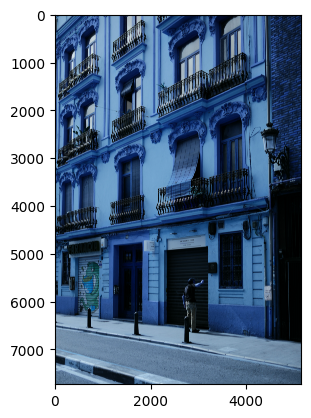

In [4]:
plt.imshow(main_image) # plt reads images as RGB
plt.show()

### Convert Image from BGR to RGB Manually

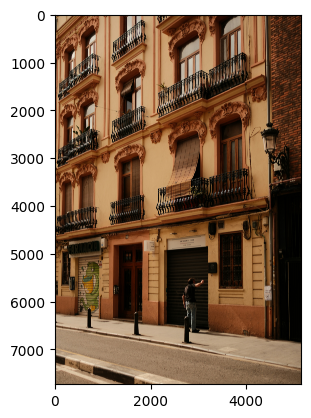

In [5]:
blue_channel = main_image[:, :, 0]
green_channel = main_image[:, :, 1]
red_channel = main_image[:, :, 2]

rgb_image = np.stack((red_channel, green_channel, blue_channel), axis=2)

plt.imshow(rgb_image)
plt.show()

### Show Different Channels

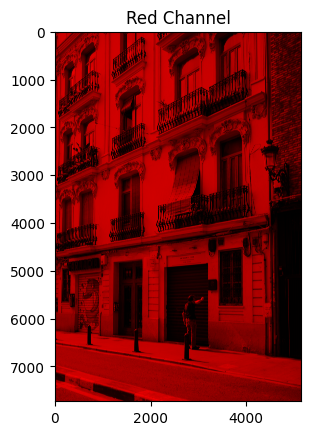

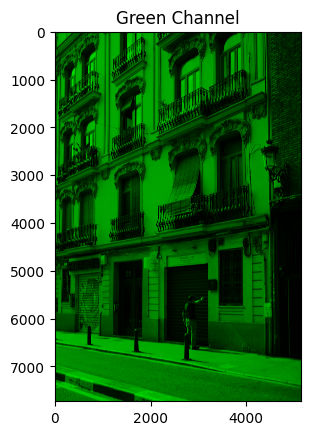

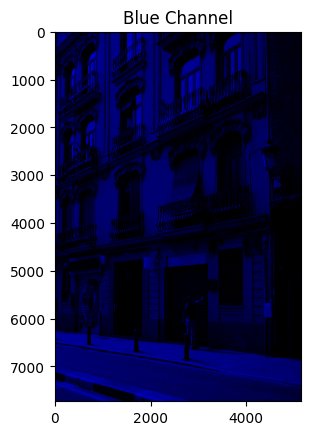

In [6]:
channel_names = ['Red', 'Green', 'Blue']

for i in range(0,3):
    temp = np.zeros_like(rgb_image, dtype='uint8')
    temp[:,:,i] = rgb_image[:, :, i]
    plt.imshow(temp)
    plt.title(channel_names[i] + ' Channel')
    plt.show()

### Use OpenCV instead!

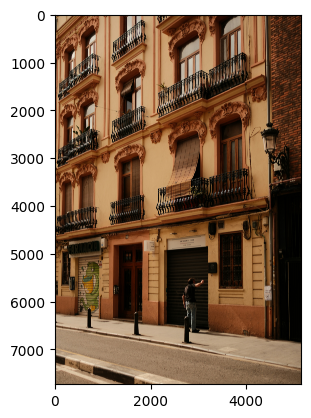

In [7]:
rgb_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB) # Convert image to RGB before reading it using plt
plt.imshow(rgb_image)
plt.show()

### Convert image from RGB to Grayscale Manually
use the formula 0.2989 * R + 0.5870 * G + 0.1140 * B

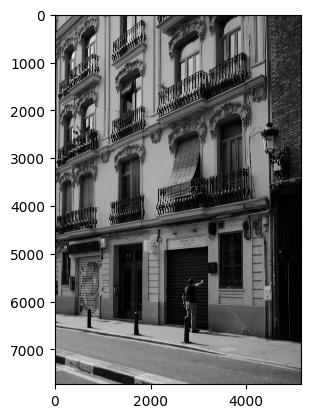

In [8]:
conversion_vector = np.array([0.2989, 0.5870, 0.1140])
gray_image = np.dot(rgb_image[:, :, 0:3], conversion_vector)

plt.imshow(gray_image, cmap='gray')
plt.show()

### Convert image from RGB to Grayscale using OpenCV


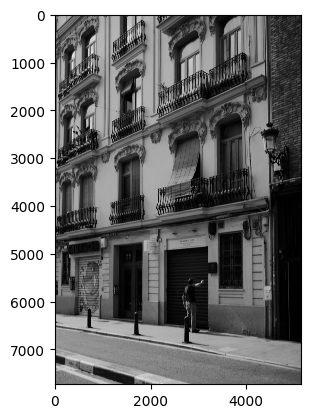

In [9]:
gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

In [10]:
print(gray_image.shape)

(7728, 5152)


# Save Image to Computer

In [41]:
cv2.imwrite('gray_image.png', gray_image)

True

## Define a function to show images easily

In [12]:
# Create a function to show images easily using plt

def show_image(image, cmap=None):
  # plt.figure(figsize=(18,18)) # Use to set "figure" size
  plt.imshow(image, cmap=cmap) # Convert image to RGB
  # plt.axis('off') # Use to hide axis
  plt.show()

# Image Cropping

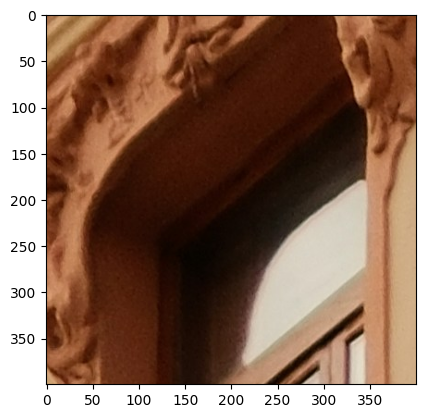

In [13]:
cropped_image = rgb_image[250:650, 500:900, :]
show_image(cropped_image)

# Image Resizing

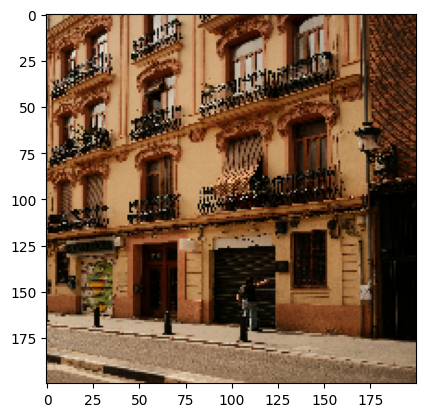

In [14]:
resized_image = cv2.resize(rgb_image, (200, 200), interpolation = cv2.INTER_LINEAR)
show_image(resized_image)

In [15]:
print(resized_image.shape)

(200, 200, 3)


# Image Rotation
* Get Image Center
* Compute Rotation Matrix
* Apply Rotation
* Show Image

In [16]:
print(rgb_image.shape)

(7728, 5152, 3)


In [17]:
# Get Image Center
img_height = rgb_image.shape[0]
img_width = rgb_image.shape[1]
img_center = (img_width/2 , img_height/2)

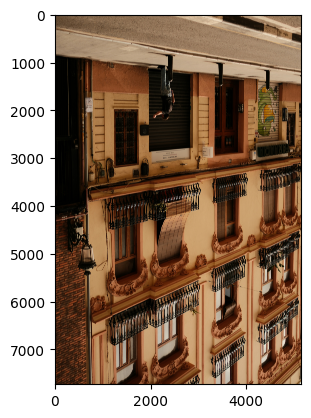

In [18]:
# Compute rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center=img_center, angle=180, scale=1.0)

# Apply rotation matrix
rotated_image = cv2.warpAffine(src=rgb_image, M=rotation_matrix, dsize=(img_width, img_height))

# Show Image
show_image(rotated_image)

# Image Filtering
Images are processed using filters or kernels. 

The size of a filter or kernel must be "odd". 

## Sharpen Kernel

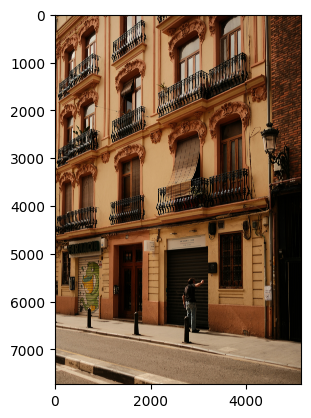

In [19]:
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

sharpened_image = cv2.filter2D(src=rgb_image, ddepth = -1, kernel = sharpen_kernel)
show_image(sharpened_image)

## Box Blur Kernel

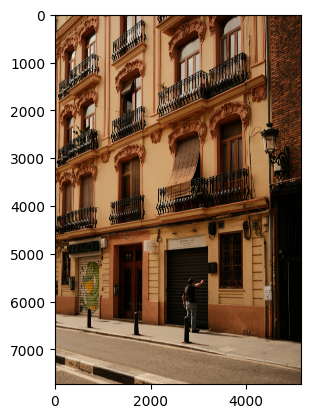

In [20]:
box_blur_kernel = np.ones((3,3)) * (1/9)

box_image = cv2.filter2D(src=rgb_image, ddepth = -1, kernel = box_blur_kernel)
show_image(box_image)

## Edge Detection Kernel

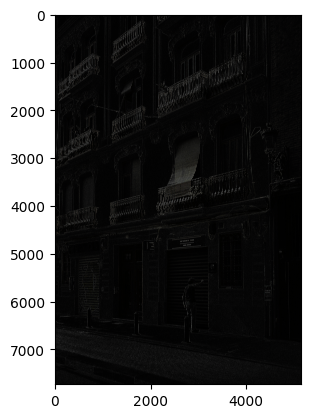

In [21]:
edge_kernel = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

edge_image = cv2.filter2D(src=rgb_image, ddepth = -1, kernel = edge_kernel)
show_image(edge_image)

## Canny Edge Detection

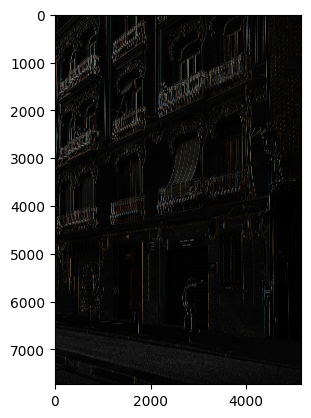

In [22]:
# Vertical Edges
vertical_canny_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

vertical_edge_image = cv2.filter2D(src=rgb_image, ddepth = -1, kernel = vertical_canny_kernel)
show_image(vertical_edge_image)

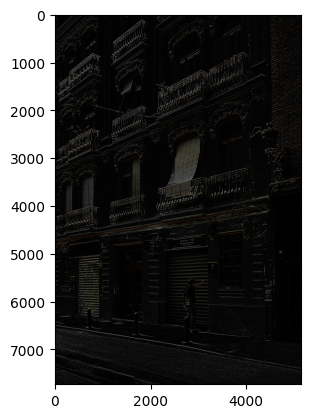

In [23]:
# Horizontal Edges
horizontal_canny_kernel = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

horizontal_edge_image = cv2.filter2D(src=rgb_image, ddepth = -1, kernel = horizontal_canny_kernel)
show_image(horizontal_edge_image)

# Image Filtering Using OpenCV

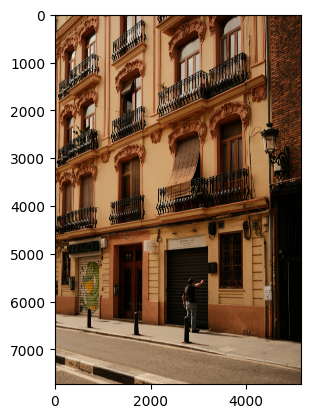

In [24]:
# Blurring 
blurred_image = cv2.blur(src=rgb_image, ksize=(3,3))
show_image(blurred_image)

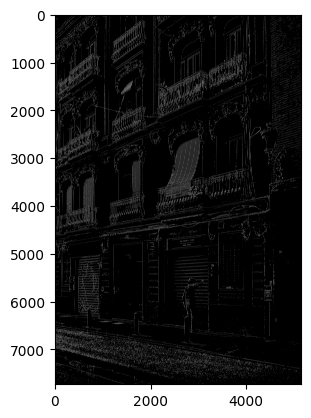

In [25]:
canny_image = cv2.Canny(gray_image, threshold1=100, threshold2=150)
show_image(canny_image, cmap='gray')

## Add Noise to Image

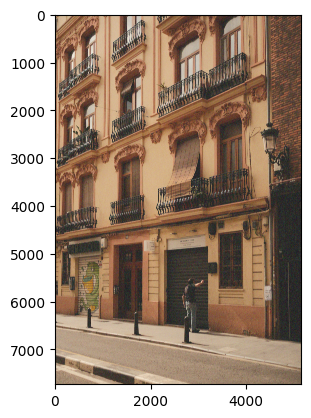

In [27]:
noise = np.random.normal(scale=1.0, size=rgb_image.shape).astype('uint8') # Generate random noise from a normal distribution
noisy_image = cv2.add(rgb_image, noise)
show_image(noisy_image)

## Image Thresholding

Threshold a 'gray' image to separate objects from the background by creating a binary mask.

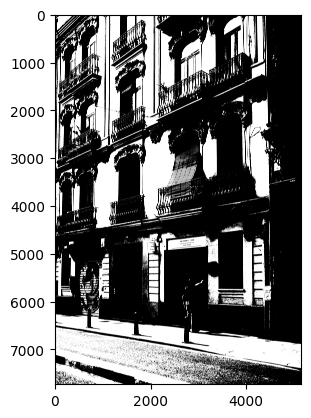

In [28]:
thresh_value, thresh_image = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY)
show_image(thresh_image, cmap='gray') 

## Draw Contours Using Threshold Image
* Detect contours using cv2.CHAIN_APPROX_NONE
* Make copy of image
* Draw contours on copied image

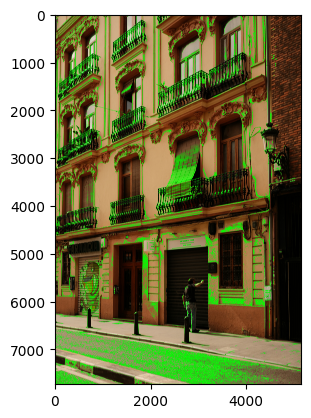

In [29]:
# find contours
contours, hierarchy = cv2.findContours(image=thresh_image, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# Copy image
image_copy = rgb_image.copy()

# apply contours
contour_image = cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
show_image(contour_image)

# Cluster Image Pixels Using KMeans
Used to:
* Compress images
* Reduce memory
* Preprocess images for deep learning

Steps:
* Flatten 3-dimensional (RGB) pixels.
* Apply KMeans clustering with the intended number of clusters (or colors).
* Show the new clustered image.

In [30]:
from sklearn.cluster import KMeans

print(rgb_image.shape)

(7728, 5152, 3)


In [31]:
# Flatten first two dimensions 
X = rgb_image.reshape(-1, 3)
X.shape

(39814656, 3)

In [34]:
# apply KMeans
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)

In [35]:
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [36]:
# Get segmented image
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image.shape

(39814656, 3)

In [37]:
segmented_image = segmented_image.reshape(rgb_image.shape)
segmented_image.shape

(7728, 5152, 3)

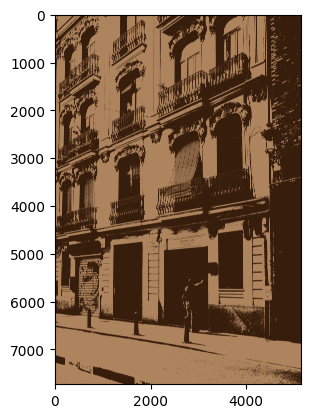

In [38]:
show_image(segmented_image / 255.0)

In [40]:
# Compare size of compressed image with original image
cv2.imwrite('clustered_image.png', cv2.cvtColor(segmented_image.astype('uint8'), cv2.COLOR_RGB2BGR))

True